#   TRASE Widgets

[Gdoc - Viz by Indicators](https://docs.google.com/document/d/1DdKbmM-TqlKyIuxPshcuIgMqu6AXmzg_vh8vMnI2Wmk/edit#)

[Invision](https://projects.invisionapp.com/share/HRNCCQFUKZV#/screens/314278527)

[Gdoc: Dashboard scope from SEI](https://docs.google.com/document/d/1VfQwFTcUrfA9FIB9VcUXdGFm-zEYprYyrEqDOghzmc4/edit)

[TRASE data download portal](https://trase.earth/data?lang=en)

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_json("/Users/Ben/Downloads/BRAZIL_SOY_2.2/BRAZIL_SOY_2.2.json")

In [3]:
df.head()

,BIOME,COUNTRY,EXPORTER,FOB_USD,IMPORTER,LAND_USE,LOGISTICS HUB,MAX_SOY_DEFORESTATION,MUNICIPALITY,PORT,SOY_DEFORESTATION,SOY_EQUIVALENT_TONS,STATE,TYPE,YEAR,ZERO_DEFORESTATION
0,AMAZONIA,Brazil,Domestic Consumption,NaN,Domestic Consumption,98.497087,DOMESTIC CONSUMPTION,49.248544,Rio Branco,Domestic Consumption,NaN,325.040387,ACRE,Soy bean equivalents,2010,no
1,AMAZONIA,Brazil,Domestic Consumption,NaN,Domestic Consumption,177.294757,DOMESTIC CONSUMPTION,0.000000,Humaita,Domestic Consumption,NaN,531.884270,AMAZONAS,Soy bean equivalents,2010,no
2,AMAZONIA,China,Bunge,17591.881611,Bunge,18.801649,NOVA MUTUM,18.801649,Alta Floresta,Paranagua,NaN,56.404948,MATO GROSSO,Soy bean equivalents,2010,yes
3,AMAZONIA,India,Bunge,607.736002,Bunge,0.602667,NOVA MUTUM,0.602667,Alta Floresta,Paranagua,NaN,1.808002,MATO GROSSO,Soy bean equivalents,2010,yes
4,AMAZONIA,Thailand,Bunge,21072.516399,Bunge,16.431762,NOVA MUTUM,16.431762,Alta Floresta,Paranagua,NaN,49.295287,MATO GROSSO,Soy bean equivalents,2010,yes


In [4]:
print(f"{len(df):,g}")

325,694


In [5]:
df_atal = df[df["MUNICIPALITY"] == "Atalaia"]

In [6]:
df_atal_china = df_atal[df_atal['COUNTRY'] == 'China']

In [7]:
df_atal_china_bung = df_atal_china[df_atal_china["EXPORTER"] == "Bunge"]

In [8]:
land_use = []
soy_volume = []
years = []
for year in df_atal_china_bung["YEAR"].unique():
    tmp = df_atal_china_bung[df_atal_china_bung["YEAR"] == year]
    land_use.append(tmp['LAND_USE'].sum())
    soy_volume.append(tmp['SOY_EQUIVALENT_TONS'].sum())
    years.append(year)

## Land use by time

Two views on the widget: absolute area, or relative to the area of Atalaia. Options could be to show the values as the total area (ha) or relative area in (%), or you could calculate both, show only one on the axis, and show the other on hover. 

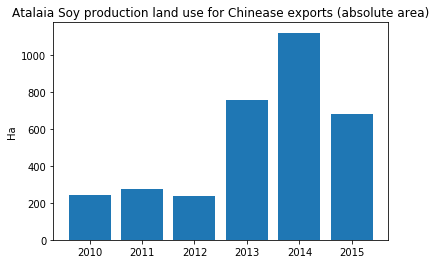

In [9]:
plt.bar(years,land_use)
plt.title("Atalaia Soy production land use for Chinease exports (absolute area)")
plt.ylabel("Ha")
plt.show()

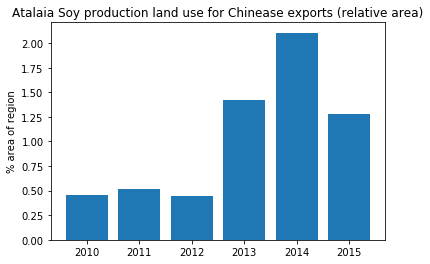

In [10]:
region_area = 53200

plt.bar(years, (np.array(land_use)/region_area) * 100)
plt.title("Atalaia Soy production land use for Chinease exports (relative area)")
plt.ylabel("% area of region")
plt.show()

## Productivity of land

By dividing the soy volume by the land use, you can calculate how productive the land is over time. We note that this may be potentially more interesting for users interested in area specific information, rather than as a function of exporter ect.

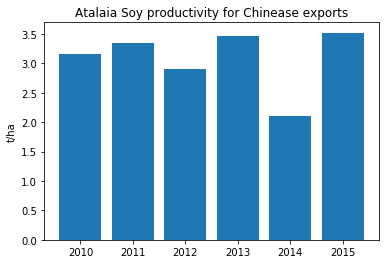

In [11]:
# Possibly a good vizulisation for region (rather than single destinations)

plt.bar(years, np.array(soy_volume)/np.array(land_use))
plt.title("Atalaia Soy productivity for Chinease exports")
plt.ylabel("t/ha")
plt.show()

## Forest 500 score

We will assume you want company sepcific information. This scale is 1-5. We suggest that you present a ranked list of companies operating in the region that highlights the company someone is specifically interested in.

Can contextualise the score by comparing to statistics from the cohort.

## Max deforestation 

Basic:
* Shows a time series of max deforestation in a region (ha). 

More advanced: 
* show both the area and relative area (relative to total area of Amazonia - or total forested area of Amazonia), can show the values on hover.
* categories the max deforestation by **copanies, or by country**, showing the top 5 or so responsible in their own colours and the rest grouped to other.


Additionally:
* pie/donut chart showing total attribution to each company for all time

In [12]:
amazonia = df[df["BIOME"] == "AMAZONIA"]

In [13]:
max_deforest = []
years=[]
for year in amazonia["YEAR"].unique():
    print(year)
    tmp = amazonia[amazonia["YEAR"] == year]
    max_deforest.append(tmp["MAX_SOY_DEFORESTATION"].sum())
    years.append(year)

2010
2011
2012
2013
2014
2015


Text(0,0.5,'ha')

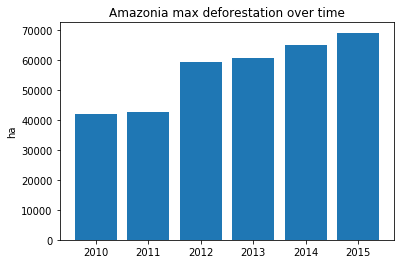

In [14]:
plt.bar(years,max_deforest)
plt.title('Amazonia max deforestation over time')
plt.ylabel("ha")

In [171]:

def prop_by_max_deforestation(df, prop='EXPORTER'):
    d = {}
    for exporter in sorted(df[prop].unique()):
        exprt_tmp = df[df[prop] == exporter]
        d[exporter] = exprt_tmp["MAX_SOY_DEFORESTATION"].sum()
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    return s

def key_prop_max_deforestation(df, key_props, prop='EXPORTER'):
    d = {}
    for key in key_props:
        exprt_tmp = df[df[prop] == key]
        d[key] = exprt_tmp["MAX_SOY_DEFORESTATION"].sum()
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    return s

Exploring the maxdeforestation attributed to each company:

In [226]:
s = prop_by_max_deforestation(amazonia, prop='EXPORTER')

labels = []
volumes = []

for item in s:
    labels.append('')
    volumes.append(item[1])

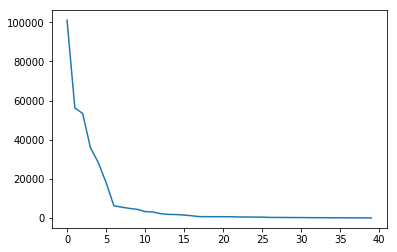

In [227]:
# Looks like the top 6 Exporters are responsible for the vast majority of deforestation - we should use 6 categories + other
plt.plot(volumes[0:40])

In [228]:
# Identify the top exporters responsible for deforestation by name

top_exporters = []
for item in s[0:6]:
    top_exporters.append(item[0])
top_exporters

['Domestic Consumption',
 'Cargill',
 'Bunge',
 'Amaggi',
 'Abc Industria E Comercio',
 'Adm']

In [174]:
for key in top_exporters:
    print(key)

Domestic Consumption
Cargill
Bunge
Amaggi
Abc Industria E Comercio
Adm


In [183]:
max_deforest = []
years=[]
quantity_by_company = {}
for year in amazonia["YEAR"].unique():
    print(year)
    years.append(year)
    tmp = amazonia[amazonia["YEAR"] == year]
    tmp_s = key_prop_max_deforestation(tmp, top_exporters, prop="EXPORTER")  # find the quantity attributed to each of the key exporters
    tmp_d = {}
    for item in tmp_s:
        tmp_d[item[0]] =item[1]
    tmp_d['Total'] = tmp["MAX_SOY_DEFORESTATION"].sum()
    quantity_by_company[year] = tmp_d

2010
2011
2012
2013
2014
2015


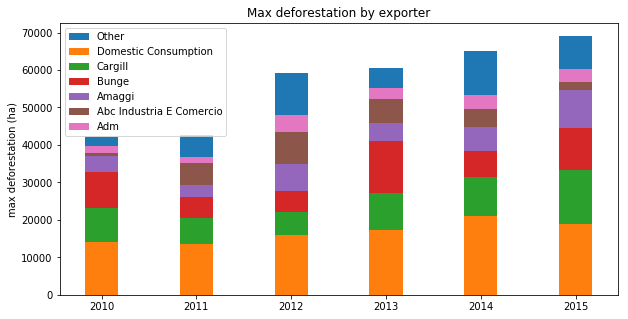

In [188]:
plt.figure(figsize=(10,5))
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
width = 0.35       # the width of the bars: can also be len(x) sequence

tmp = []
for year in quantity_by_company.keys():
    tmp.append(quantity_by_company[year]['Total'])   
plt.bar(years, tmp, width, label='Other')

years = list(quantity_by_company.keys())
expcount = 0
for exporter in top_exporters:
    tmp = []
    for year in quantity_by_company.keys():
        tmp.append(quantity_by_company[year][exporter])
    if expcount == 0:
        plt.bar(years, tmp, width, label=exporter)
        past_values = np.array(tmp)
    else:
        plt.bar(years, tmp, width, bottom=past_values, label=exporter)
        past_values = np.array(tmp) + past_values
        pass
    expcount += 1

plt.ylabel('max deforestation (ha)')
plt.title('Max deforestation by exporter')
plt.legend()

plt.show()

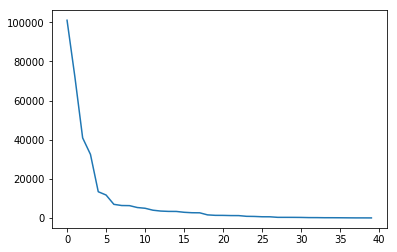

In [229]:
s = prop_by_max_deforestation(amazonia, prop='COUNTRY')

labels = []
volumes = []

for item in s:
    labels.append('')
    volumes.append(item[1])

plt.plot(volumes[0:40])

In [230]:
# Identify the top countries responsible for deforestation by name

top_countries = []
for item in s[0:6]:
    top_countries.append(item[0])
top_countries

['Brazil', 'China', 'Spain', 'Netherlands', 'United Kingdom', 'Thailand']

In [205]:
max_deforest = []
years=[]
quantity_by_country = {}
for year in amazonia["YEAR"].unique():
    print(year)
    years.append(year)
    tmp = amazonia[amazonia["YEAR"] == year]
    tmp_s = key_prop_max_deforestation(tmp, top_countries, prop="COUNTRY")  # find the quantity attributed to each of the key exporters
    tmp_d = {}
    for item in tmp_s:
        tmp_d[item[0]] =item[1]
    tmp_d['Total'] = tmp["MAX_SOY_DEFORESTATION"].sum()
    quantity_by_country[year] = tmp_d

2010
2011
2012
2013
2014
2015


In [206]:
tmp_s

[('Brazil', 19011.13839918929),
 ('China', 15966.851940321721),
 ('Spain', 7430.38267747737),
 ('Netherlands', 5756.991430680981),
 ('United Kingdom', 1572.6563217149458),
 ('Thailand', 1047.3946935751799)]

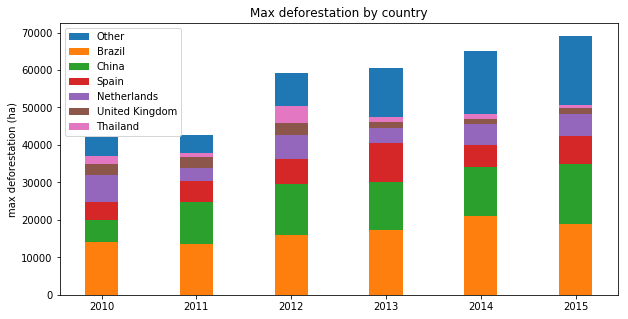

In [220]:
plt.figure(figsize=(10,5))
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
width = 0.35       # the width of the bars: can also be len(x) sequence

years = list(quantity_by_country.keys())

tmp = []
for year in quantity_by_country.keys():
    tmp.append(quantity_by_country[year]['Total'])   
plt.bar(years, tmp, width, label='Other')

expcount = 0
for country in top_countries:
    tmp = []
    for year in quantity_by_company.keys():
        try:
            tmp.append(quantity_by_country[year][country])
        except:
            print(f'error for {year} {country}')
            tmp.append(0)            
    if expcount == 0:
        plt.bar(years, tmp, width, label=country)
        past_values = np.array(tmp)
    else:
        plt.bar(years, tmp, width, bottom=past_values, label=country)
        past_values = np.array(tmp) + past_values
        pass
    expcount += 1

plt.ylabel('max deforestation (ha)')
plt.title('Max deforestation by country')
plt.legend()

plt.show()

### Donut chart - area attributed to each company (you could add a year range selector to this to let users select the period)


In [234]:
top_countries

['Brazil', 'China', 'Spain', 'Netherlands', 'United Kingdom', 'Thailand']

In [242]:
max_deforest = []
all_quantity_by_company = {}
tmp_s = key_prop_max_deforestation(amazonia, top_countries, prop="COUNTRY") # find the quantity attributed to each of the key exporters
tmp_d = {}
for item in tmp_s:
    tmp_d[item[0]] =item[1]
tmp_d['Total'] = amazonia["MAX_SOY_DEFORESTATION"].sum()
quantity_by_company[year] = tmp_d

In [243]:
tmp_d

{'Brazil': 101049.0449328909,
 'China': 72274.71298978294,
 'Spain': 40960.83098040374,
 'Netherlands': 32535.76726711663,
 'United Kingdom': 13456.247203387575,
 'Thailand': 11780.738472024008,
 'Total': 338738.9397374537}

In [252]:
countries = list(tmp_d.keys())
countries.remove("Total")
countries.append("Other")

In [258]:
list(tmp_d.values())

[101049.0449328909,
 72274.71298978294,
 40960.83098040374,
 32535.76726711663,
 13456.247203387575,
 11780.738472024008,
 338738.9397374537]

In [280]:
total = 0
not_total = 0

plot_values = []

for k in tmp_d:
    if k == 'Total':
        total = tmp_d[k]
    else:
        plot_values.append(tmp_d[k])

other = total - np.sum(plot_values)

plot_values.append(other)

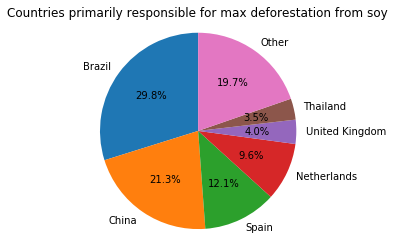

In [283]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = countries
sizes = plot_values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Countries primarily responsible for max deforestation from soy")
plt.show()

*** 
## Financial flow
**Argentina-Beef (2012-2015)**

In [18]:
df = pd.read_json("/Users/ikersanchez/Vizzuality/PROIEKTUAK/TRASE/work/data/ARGENTINA_BEEF/ARGENTINA_BEEF.json")
df.head()

,BEEF_EQUIVALENT_TONS,COUNTRY,COUNTRY OF PRODUCTION,EXPORTER,FOB_USD,PORT,TYPE,YEAR
0,8485.714711,Angola,ARGENTINA,Unknown Customer,17140313.39,Buenos Aires,Beef equivalents,2012
1,243.356614,Belgium,ARGENTINA,Unknown Customer,1168792.08,Buenos Aires,Beef equivalents,2012
2,6489.458987,Brazil,ARGENTINA,Unknown Customer,66086133.65,Buenos Aires,Beef equivalents,2012
3,4785.178980,Brazil,ARGENTINA,Unknown Customer,26672365.76,Buenos Aires,Beef equivalents,2012
4,7061.449272,Chile,ARGENTINA,Unknown Customer,39127845.45,Buenos Aires,Beef equivalents,2012


In [19]:
fob_usd = []
beef_volume= []
years = []
for year in df["YEAR"].unique():
    tmp = df[df["YEAR"] == year]
    fob_usd.append(tmp['FOB_USD'].sum())
    beef_volume.append(tmp['BEEF_EQUIVALENT_TONS'].sum())
    years.append(year)

**Financial flow per year**

This widget shows the total amount of money spent on beef per year. 

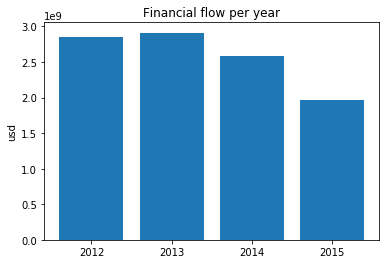

In [20]:
plt.bar(years,fob_usd)
plt.ylabel("usd")
plt.xticks(years)
plt.title("Financial flow per year")
plt.show()

**Beef price per year**

By dividing the total amount of money by the total beef volume, you can calculate the beef price over time. 

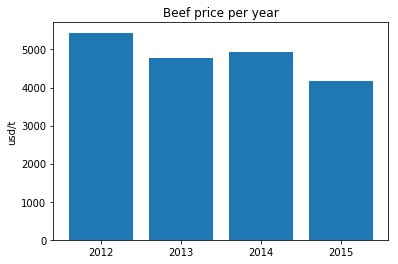

In [21]:
plt.bar(years, np.array(fob_usd)/np.array(beef_volume))
plt.title("Beef price per year")
plt.ylabel("usd/t")
plt.xticks(years)
plt.show()

**Financial flow by country**

In [22]:
def  prop_fob_usd(df, prop='COUNTRY'):
    d = {}
    for country in sorted(df[prop].unique()):
        tmp = df[df[prop] == country]
        d[country] = tmp["FOB_USD"].sum()
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    return s

def key_prop_fob_usd(df, key_props, prop='COUNTRY'):
    d = {}
    for key in key_props:
        exprt_tmp = df[df[prop] == key]
        d[key] = exprt_tmp["FOB_USD"].sum()
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    return s

In [23]:
s = prop_fob_usd(df, prop='COUNTRY')

labels = []
amount = []

for item in s:
    labels.append(item[0])
    amount.append(item[1])

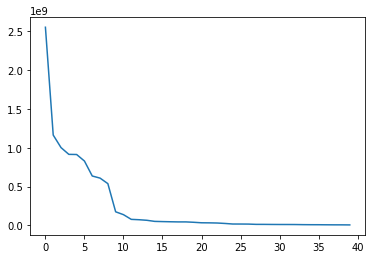

In [24]:
# Top 9 Countries are responsible for the vast majority of the financial flow
plt.plot(amount[0:40])

In [25]:
# Top 9 exporters
top_countries = labels[0:9]
top_countries

['Germany',
 'Chile',
 'Russian Federation',
 'Netherlands',
 'Hong Kong',
 'Israel',
 'China',
 'Brazil',
 'Italy']

In [80]:
years=[]
quantity_by_country = {}
for year in df["YEAR"].unique():
    years.append(year)
    tmp = df[df["YEAR"] == year]
    tmp_s = key_prop_fob_usd(tmp, top_countries, prop="COUNTRY") 
    tmp_d = {}
    for item in tmp_s:
        tmp_d[item[0]] =item[1]
    tmp_d['Total'] = tmp["FOB_USD"].sum()
    quantity_by_country[year] = tmp_d

**Total amount per year for the top 9 countries**

Stacked bar

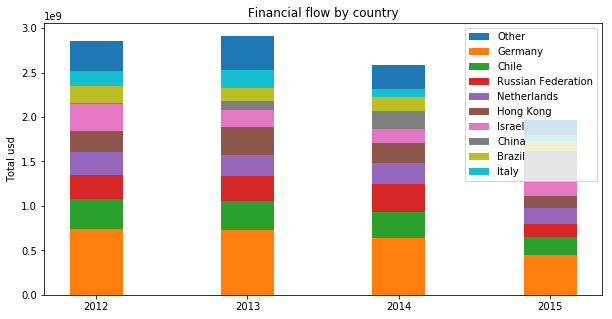

In [27]:
plt.figure(figsize=(10,5))
width = 0.35    # the width of the bars: can also be len(x) sequence

tmp = []
for year in quantity_by_country.keys():
    tmp.append(quantity_by_country[year]['Total'])   
plt.bar(years, tmp, width, label='Other')

years = list(quantity_by_country.keys())
expcount = 0
for country in top_countries:
    tmp = []
    for year in quantity_by_country.keys():
        tmp.append(quantity_by_country[year][country])
    if expcount == 0:
        plt.bar(years, tmp, width, label=country)
        past_values = np.array(tmp)
    else:
        plt.bar(years, tmp, width, bottom=past_values, label=country)
        past_values = np.array(tmp) + past_values
        pass
    expcount += 1

plt.ylabel('Total usd')
plt.title('Financial flow by country')
plt.legend()
plt.xticks(years)

plt.show()

Interestingly we can see clear trends of different countries such as Germany or China. These trends could be better shown with a *Timeseries* plot

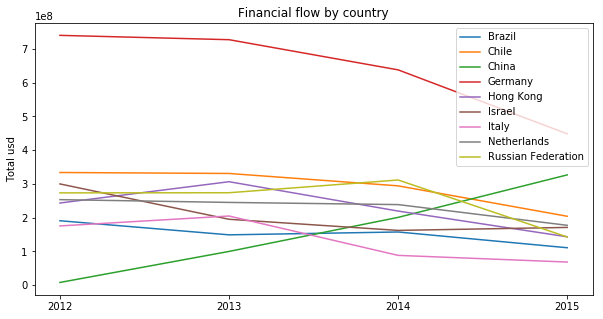

In [28]:
df_country = pd.DataFrame(quantity_by_country)
countries = df_country.index
plt.figure(figsize=(10,5))

for i in range(len(df_country)-1):
    plt.plot(df_country.iloc[i], label=countries[i])

plt.ylabel('Total usd')
plt.title('Financial flow by country')
plt.legend(loc=1)
plt.xticks(years)

plt.show()

**Countries primarily responsible for the financial flow of beef (Pie chart)** 

In [81]:
tmp_d = quantity_by_country[2015]
tmp_d

{'Brazil': 110970692.59000002,
 'Chile': 204214263.26999873,
 'China': 326717908.5200001,
 'Germany': 448378584.93000025,
 'Hong Kong': 143310736.85000002,
 'Israel': 171141769.41000012,
 'Italy': 68583768.46,
 'Netherlands': 177414896.66,
 'Russian Federation': 142868813.03999996,
 'Total': 1969661191.719999}

In [82]:
total = 0
values = []

for k in tmp_d:
    if k == 'Total':
        total = tmp_d[k]
    else:
        values.append(tmp_d[k])

other = total - np.sum(values)

values.append(other)

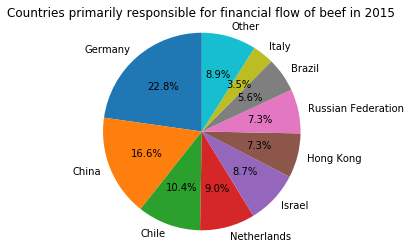

In [83]:
labels = list(tmp_d.keys())
labels.remove("Total")
labels.append("Other")

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')
plt.title("Countries primarily responsible for financial flow of beef in 2015");

**Beef price by country**

In [85]:
def key_prop_price(df, key_props, prop='COUNTRY'):
    d = {}
    for key in key_props:
        exprt_tmp = df[df[prop] == key]
        d[key] = np.array(tmp["FOB_USD"].sum())/np.array(tmp["BEEF_EQUIVALENT_TONS"].sum())
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    return s

In [86]:
years=[]
quantity_by_country = {}
for year in df["YEAR"].unique():
    print(year)
    years.append(year)
    tmp = df[df["YEAR"] == year]
    tmp_s = key_prop_price(tmp, top_countries, prop="COUNTRY") 
    tmp_d = {}
    for item in tmp_s:
        tmp_d[item[0]] =item[1]
    tmp_d['Total'] = np.array(tmp["FOB_USD"].sum())/np.array(tmp["BEEF_EQUIVALENT_TONS"].sum())
    quantity_by_country[year] = tmp_d

2012
2013
2014
2015


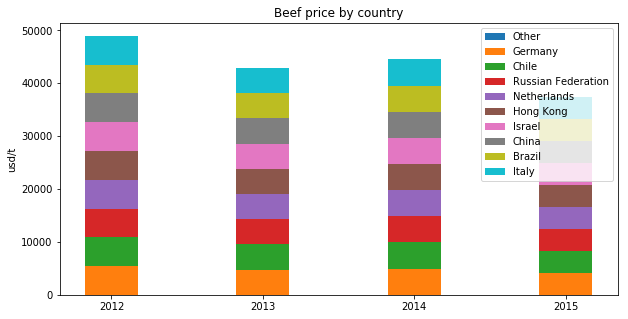

In [87]:
plt.figure(figsize=(10,5))
width = 0.35    # the width of the bars: can also be len(x) sequence

tmp = []
for year in quantity_by_country.keys():
    tmp.append(quantity_by_country[year]['Total'])   
plt.bar(years, tmp, width, label='Other')

years = list(quantity_by_country.keys())
expcount = 0
for country in top_countries:
    tmp = []
    for year in quantity_by_country.keys():
        tmp.append(quantity_by_country[year][country])
    if expcount == 0:
        plt.bar(years, tmp, width, label=country)
        past_values = np.array(tmp)
    else:
        plt.bar(years, tmp, width, bottom=past_values, label=country)
        past_values = np.array(tmp) + past_values
        pass
    expcount += 1

plt.ylabel('usd/t')
plt.title('Beef price by country')
plt.legend()
plt.xticks(years)

plt.show()

The beef price decreases a bit with time but there are no major differences between countries